# A304_SRO_NGO_100K

How to use Template:
    i.  Change file Address
    ii. Set 'truncate' True if the initial data ranges from 0 to Bmax

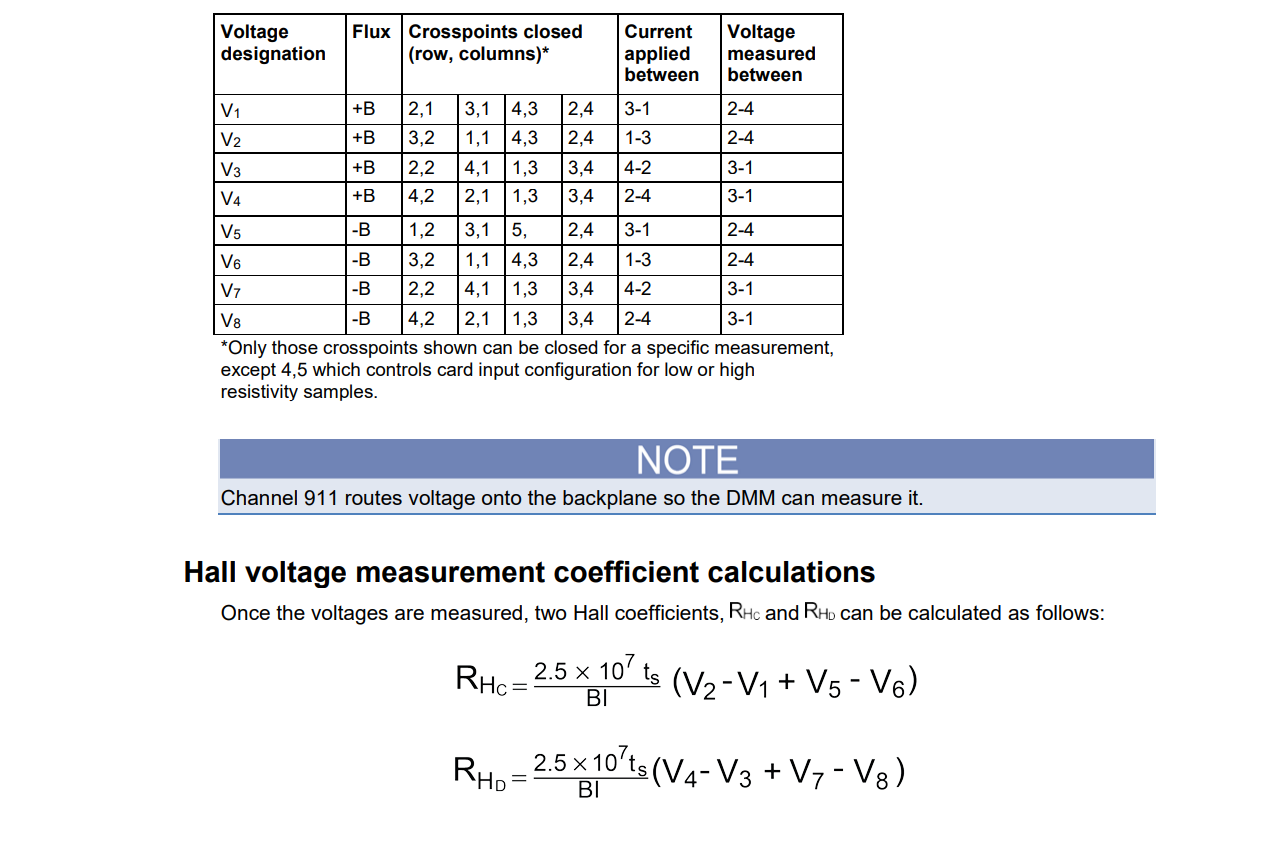

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os


In [28]:
truncate = False # True it contains data from O to Bmax
path = r"..\..\..\Data\A304\A304_Hall_center_contact"
filename = 'A304_SRO_NGO_100K.csv'
df = pd.read_csv(os.path.join(path, filename), names=["I", "B","T", "V1", "V2", "V3", "V4",'Rel_value','multiplier'])
df


,I,B,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,10000.406396,100.000961,-34.690324,34.730935,-64.657526,64.697979,6.616000e-07,1000000.0
1,0.001,9000.264844,100.000149,-34.210121,34.237988,-64.153412,64.179547,6.420000e-07,1000000.0
2,0.001,8000.341309,100.000249,-33.705043,33.739208,-63.600419,63.642887,6.296000e-07,1000000.0
3,0.001,7000.449561,99.999926,-33.219665,33.244866,-63.087084,63.090434,6.412000e-07,1000000.0
4,0.001,6000.466553,99.999952,-32.729876,32.764362,-62.519688,62.553321,6.159000e-07,1000000.0
...,...,...,...,...,...,...,...,...,...
61,0.001,6000.172461,100.000516,-31.898239,31.896254,-61.643857,61.705542,5.640000e-07,1000000.0
62,0.001,7000.385913,99.999683,-32.849471,32.901124,-62.653079,62.710614,5.580000e-07,1000000.0
63,0.001,8000.245996,100.000254,-33.556957,33.610274,-63.390834,63.432473,5.661000e-07,1000000.0
64,0.001,9000.409375,100.000042,-34.158305,34.198000,-64.066740,64.104935,5.622000e-07,1000000.0


### Converting B to integer B

In [29]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[['I', 'B','B_int', 'T', 'V1', 'V2', 'V3', 'V4', 'Rel_value', 'multiplier']].copy()

In [30]:
df.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,10000.406396,10000,100.000961,-34.690324,34.730935,-64.657526,64.697979,6.616000e-07,1000000.0
1,0.001,9000.264844,9000,100.000149,-34.210121,34.237988,-64.153412,64.179547,6.420000e-07,1000000.0
2,0.001,8000.341309,8000,100.000249,-33.705043,33.739208,-63.600419,63.642887,6.296000e-07,1000000.0
3,0.001,7000.449561,7000,99.999926,-33.219665,33.244866,-63.087084,63.090434,6.412000e-07,1000000.0
4,0.001,6000.466553,6000,99.999952,-32.729876,32.764362,-62.519688,62.553321,6.159000e-07,1000000.0


In [31]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

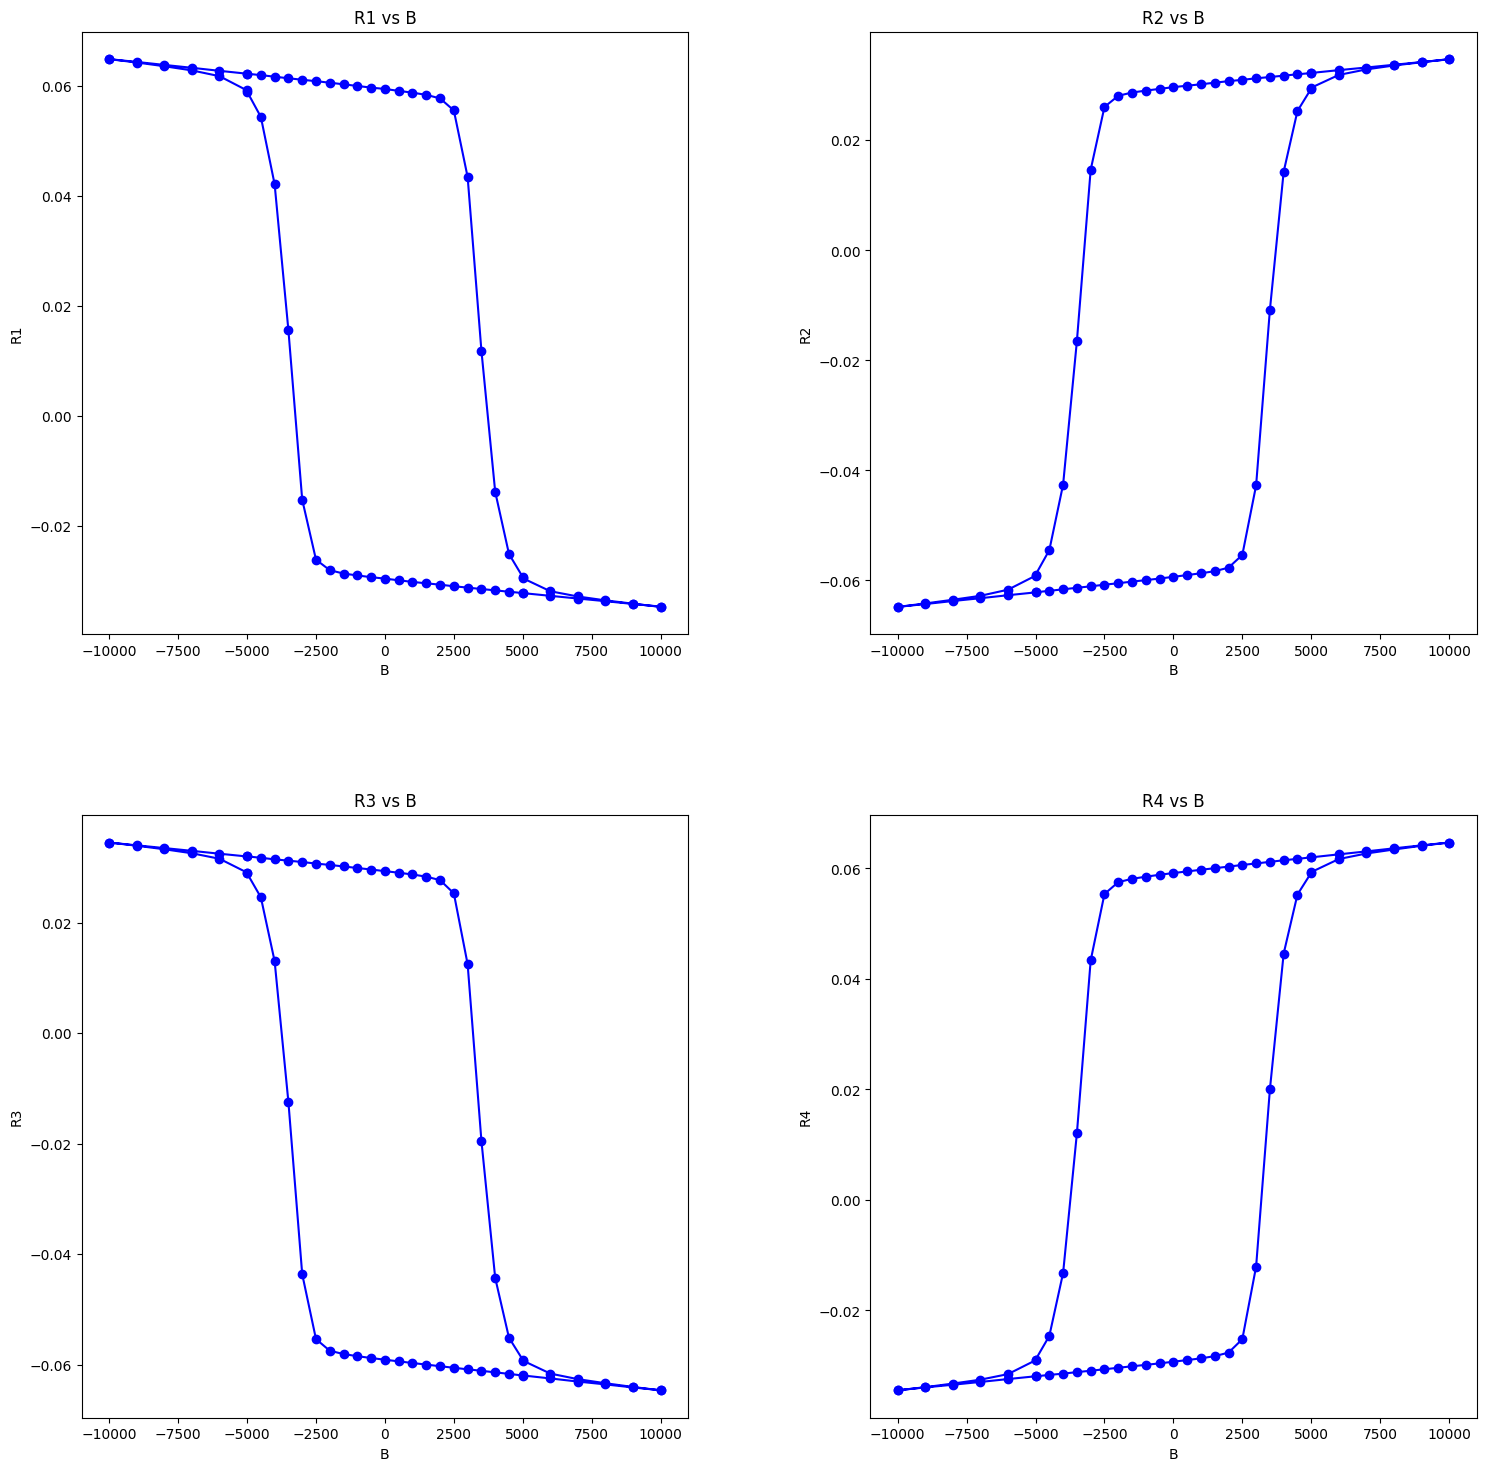

In [32]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

### Truncating intial data (0 to 1 T)

In [33]:
if(truncate):
    B_max = max(df['B_int'])
    B_max_first_idx = 0
    for i in range(len(df)):
        if df.iloc[i].B_int == B_max:
            B_max_first_idx = i
            break
    print(B_max_first_idx)

    df = df.iloc[B_max_first_idx+1:].copy()
    df.reset_index(inplace = True, drop = True) # resetting index

In [34]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

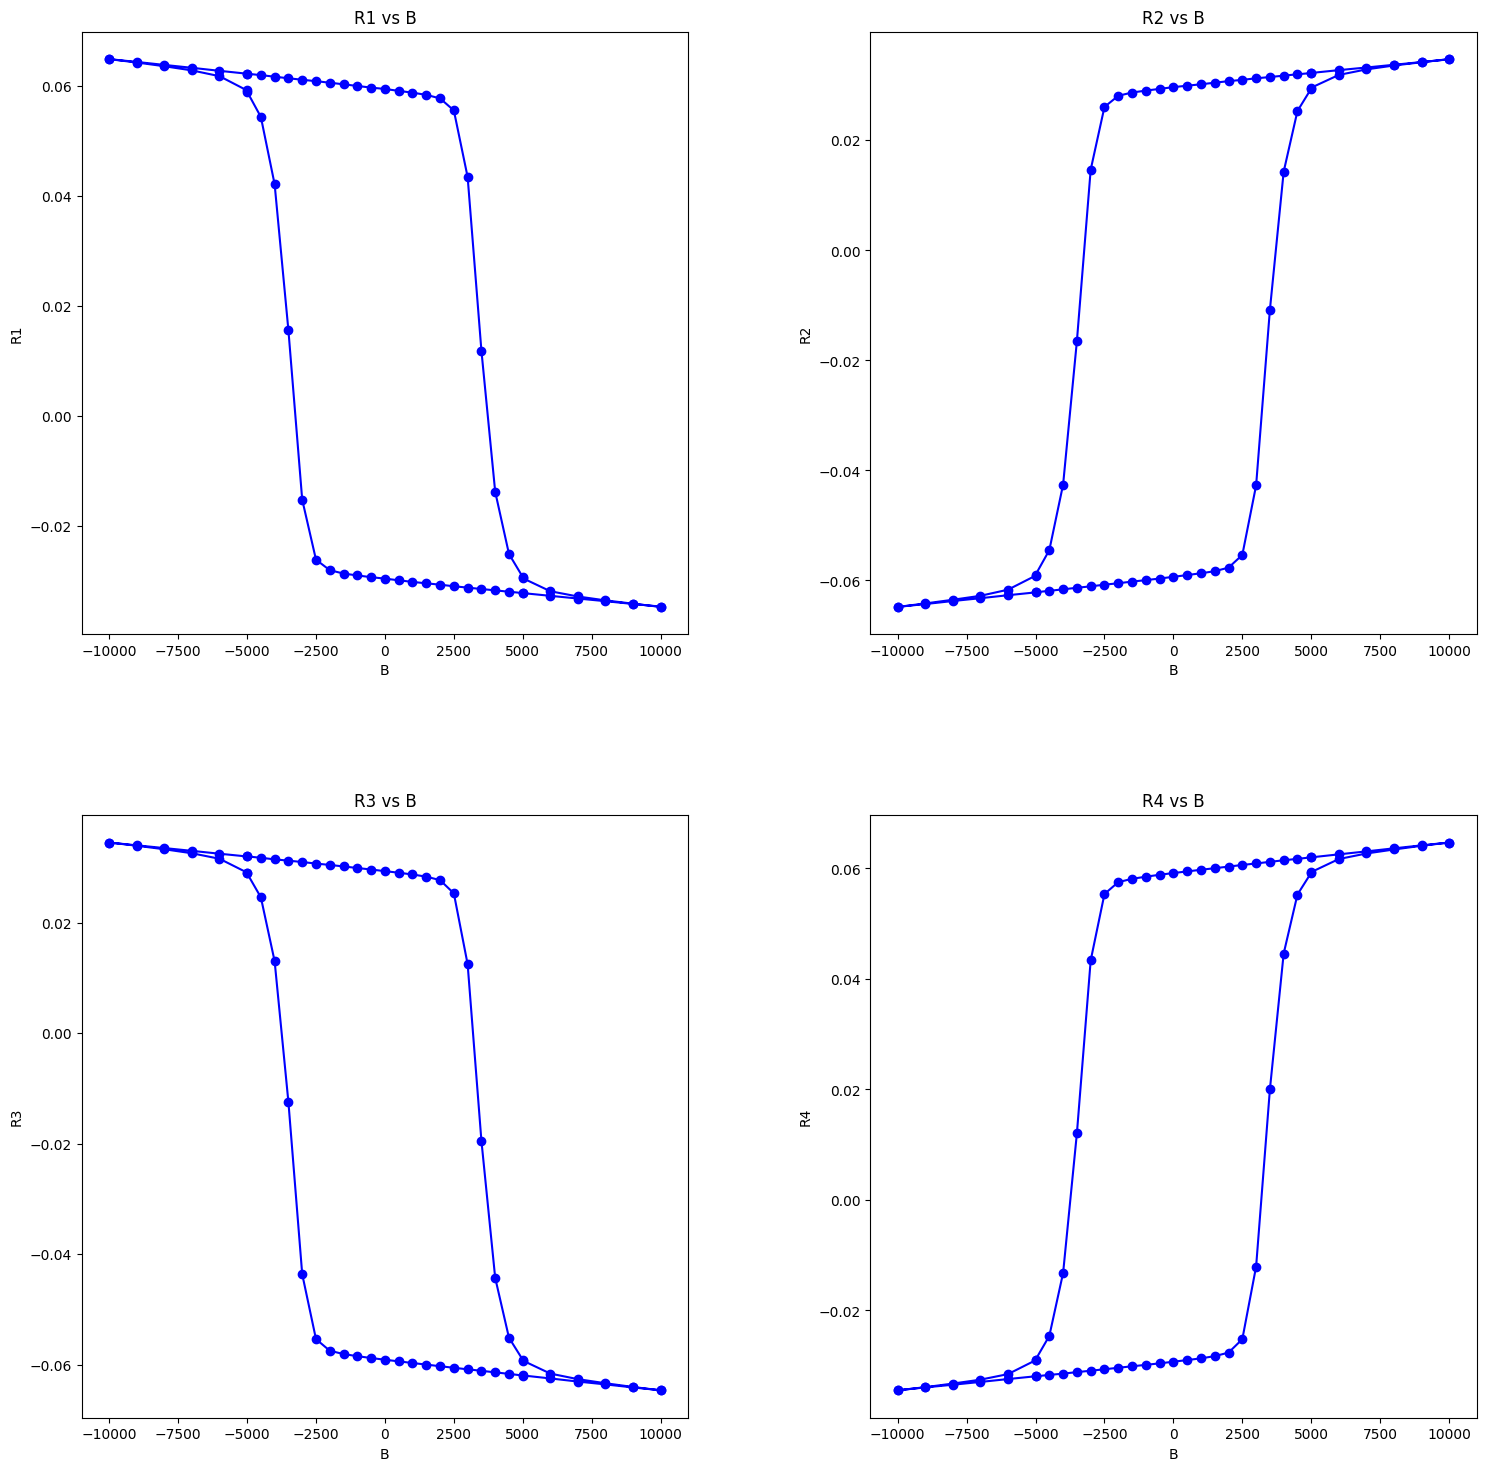

In [35]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()


## Spliting data into two subset (increasing and decreasing of magnetic field)

B_max to B_min --> Decreasing

B_min to B_max --> increasing


In [36]:
B_max = max(df['B_int'])
B_min = min(df['B_int'])
print(B_max, B_min)

10000 -10000


In [37]:
# finding index of first appearance of B_min
B_min_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_min:
        B_min_first_idx = i
        break
B_min_first_idx

32

In [38]:
# now split it into two data set
df_dec = df.iloc[0:B_min_first_idx+1].copy()
df_inc = df.iloc[B_min_first_idx+1:].copy()

In [39]:
df_dec.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,10000.406396,10000,100.000961,-34.690324,34.730935,-64.657526,64.697979,6.616000e-07,1000000.0
1,0.001,9000.264844,9000,100.000149,-34.210121,34.237988,-64.153412,64.179547,6.420000e-07,1000000.0
2,0.001,8000.341309,8000,100.000249,-33.705043,33.739208,-63.600419,63.642887,6.296000e-07,1000000.0
3,0.001,7000.449561,7000,99.999926,-33.219665,33.244866,-63.087084,63.090434,6.412000e-07,1000000.0
4,0.001,6000.466553,6000,99.999952,-32.729876,32.764362,-62.519688,62.553321,6.159000e-07,1000000.0


In [40]:
df_inc.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
33,0.001,-10000.443896,-10000,100.000256,64.832037,-64.809533,34.488566,-34.460855,5.533000e-07,1000000.0
34,0.001,-9000.498682,-9000,100.000253,64.318217,-64.285992,33.979358,-33.942060,5.536000e-07,1000000.0
35,0.001,-8000.523438,-8000,99.999881,63.776950,-63.739699,33.488247,-33.456710,5.541000e-07,1000000.0
36,0.001,-7000.452856,-7000,100.000267,63.251975,-63.224125,32.982895,-32.952240,5.521000e-07,1000000.0
37,0.001,-6000.472070,-6000,99.999924,62.704489,-62.682306,32.465972,-32.430562,5.520000e-07,1000000.0


In [41]:
df_dec.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates
df_inc.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates

## Creating decreasing Field data

In [42]:
data_dec = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1) # cross product

data_dec = data_dec[data_dec['B_int_x'] == -1*data_dec['B_int_y']] # selecting 
data_dec = data_dec[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data_dec.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data_dec.reset_index(inplace = True, drop = True) # resetting index
data_dec.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.001,10000,100.000961,-34.690324,34.730935,-64.657526,64.697979,64.832037,-64.809533,34.488566,-34.460855,1000000.0
1,0.001,9000,100.000149,-34.210121,34.237988,-64.153412,64.179547,64.318217,-64.285992,33.979358,-33.942060,1000000.0
2,0.001,8000,100.000249,-33.705043,33.739208,-63.600419,63.642887,63.776950,-63.739699,33.488247,-33.456710,1000000.0
3,0.001,7000,99.999926,-33.219665,33.244866,-63.087084,63.090434,63.251975,-63.224125,32.982895,-32.952240,1000000.0
4,0.001,6000,99.999952,-32.729876,32.764362,-62.519688,62.553321,62.704489,-62.682306,32.465972,-32.430562,1000000.0


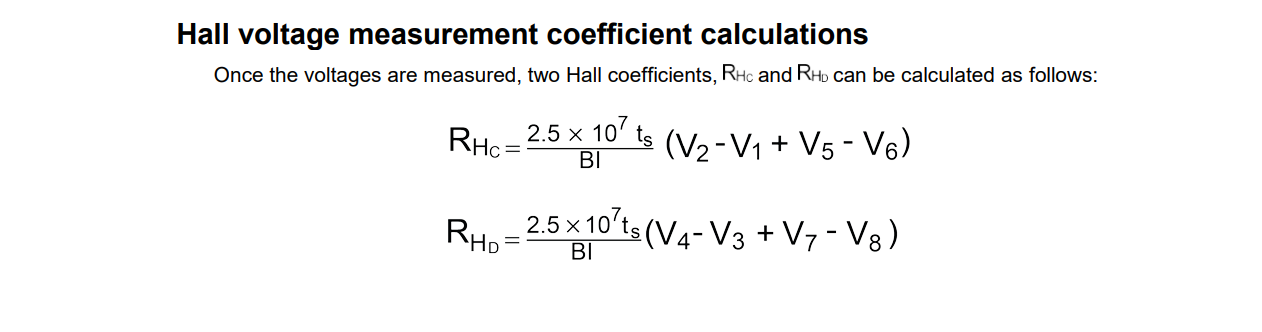
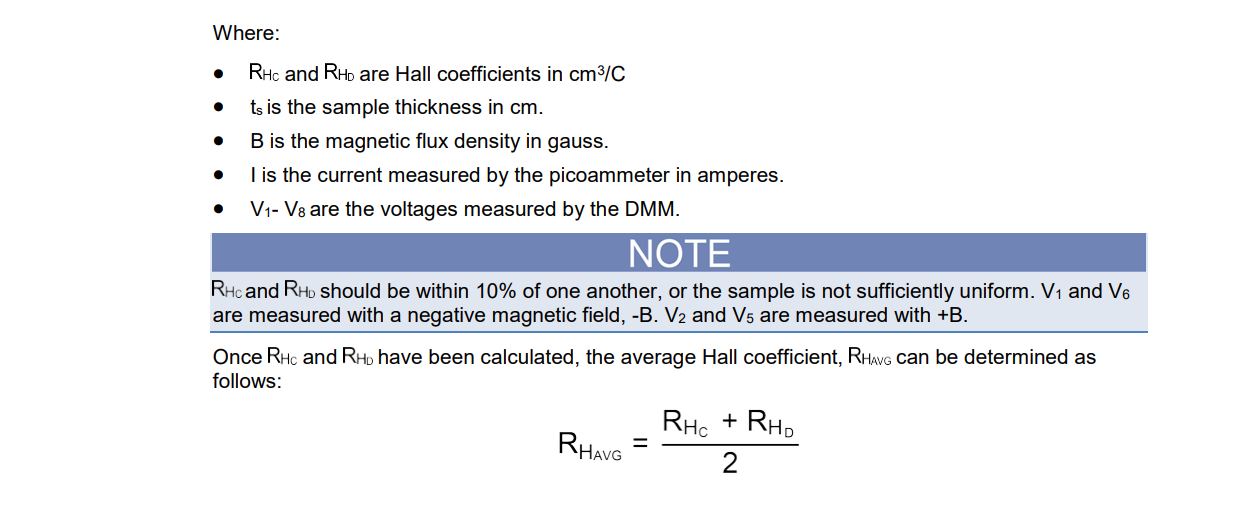

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [43]:
data_dec['RHc'] = (-data_dec['V2'] + data_dec['V1'] - data_dec['V5'] + data_dec['V6'])/(data_dec['I']*data_dec['multiplier'])
data_dec['RHd'] = (-data_dec['V4'] + data_dec['V3'] - data_dec['V7'] + data_dec['V8'])/(data_dec['I']*data_dec['multiplier'])
data_dec['R'] = (data_dec['RHc'] + data_dec['RHd'])/2

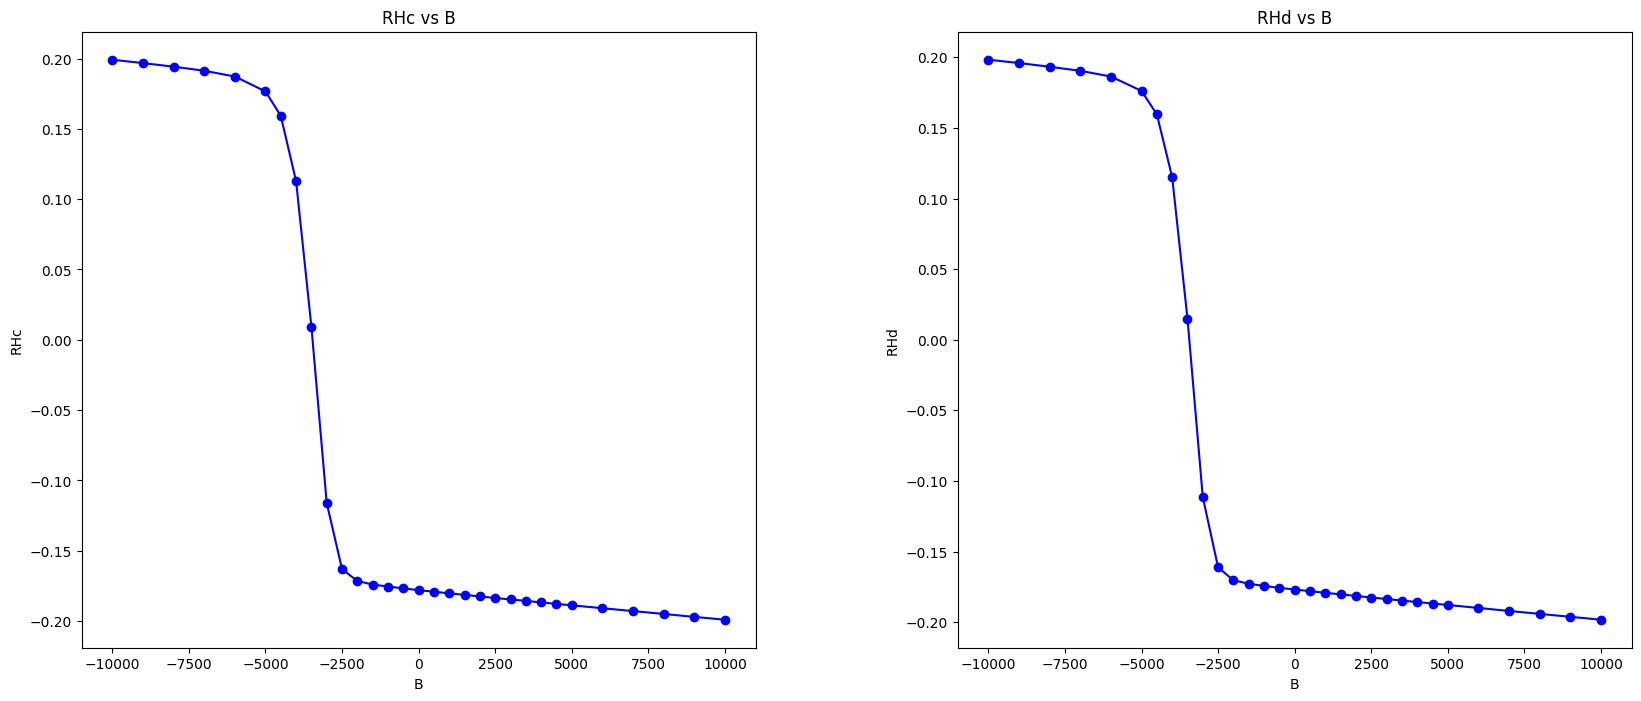

In [44]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data_dec['B'],data_dec['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data_dec['B'],data_dec['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

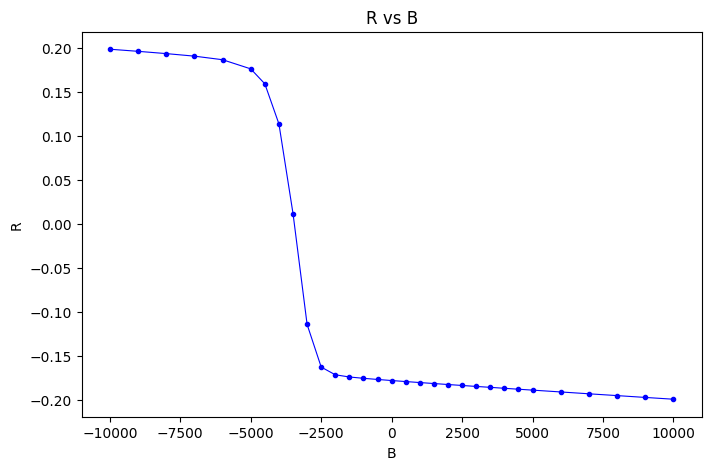

In [45]:
plt.figure(figsize=(8,5))
plt.plot(data_dec['B'],data_dec['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Creating Increasing Field data

In [46]:
data_inc = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1) # cross product

data_inc = data_inc[data_inc['B_int_x'] == -1*data_inc['B_int_y']] # selecting 
data_inc = data_inc[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data_inc.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data_inc.reset_index(inplace = True, drop = True) # resetting index
data_inc.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.001,-10000,100.000256,64.832037,-64.809533,34.488566,-34.460855,-34.690324,34.730935,-64.657526,64.697979,1000000.0
1,0.001,-9000,100.000253,64.318217,-64.285992,33.979358,-33.942060,-34.210121,34.237988,-64.153412,64.179547,1000000.0
2,0.001,-8000,99.999881,63.776950,-63.739699,33.488247,-33.456710,-33.705043,33.739208,-63.600419,63.642887,1000000.0
3,0.001,-7000,100.000267,63.251975,-63.224125,32.982895,-32.952240,-33.219665,33.244866,-63.087084,63.090434,1000000.0
4,0.001,-6000,99.999924,62.704489,-62.682306,32.465972,-32.430562,-32.729876,32.764362,-62.519688,62.553321,1000000.0


### Hall resistance calculation

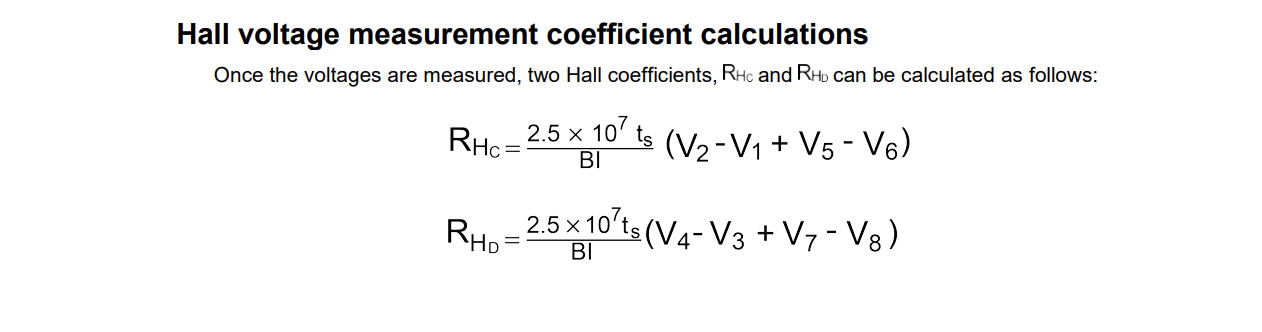

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [47]:
data_inc['RHc'] = (-data_inc['V2'] + data_inc['V1'] - data_inc['V5'] + data_inc['V6'])/(data_inc['I']*data_inc['multiplier'])
data_inc['RHd'] = (-data_inc['V4'] + data_inc['V3'] - data_inc['V7'] + data_inc['V8'])/(data_inc['I']*data_inc['multiplier'])

data_inc['R'] = (data_inc['RHc'] + data_inc['RHd'])/2

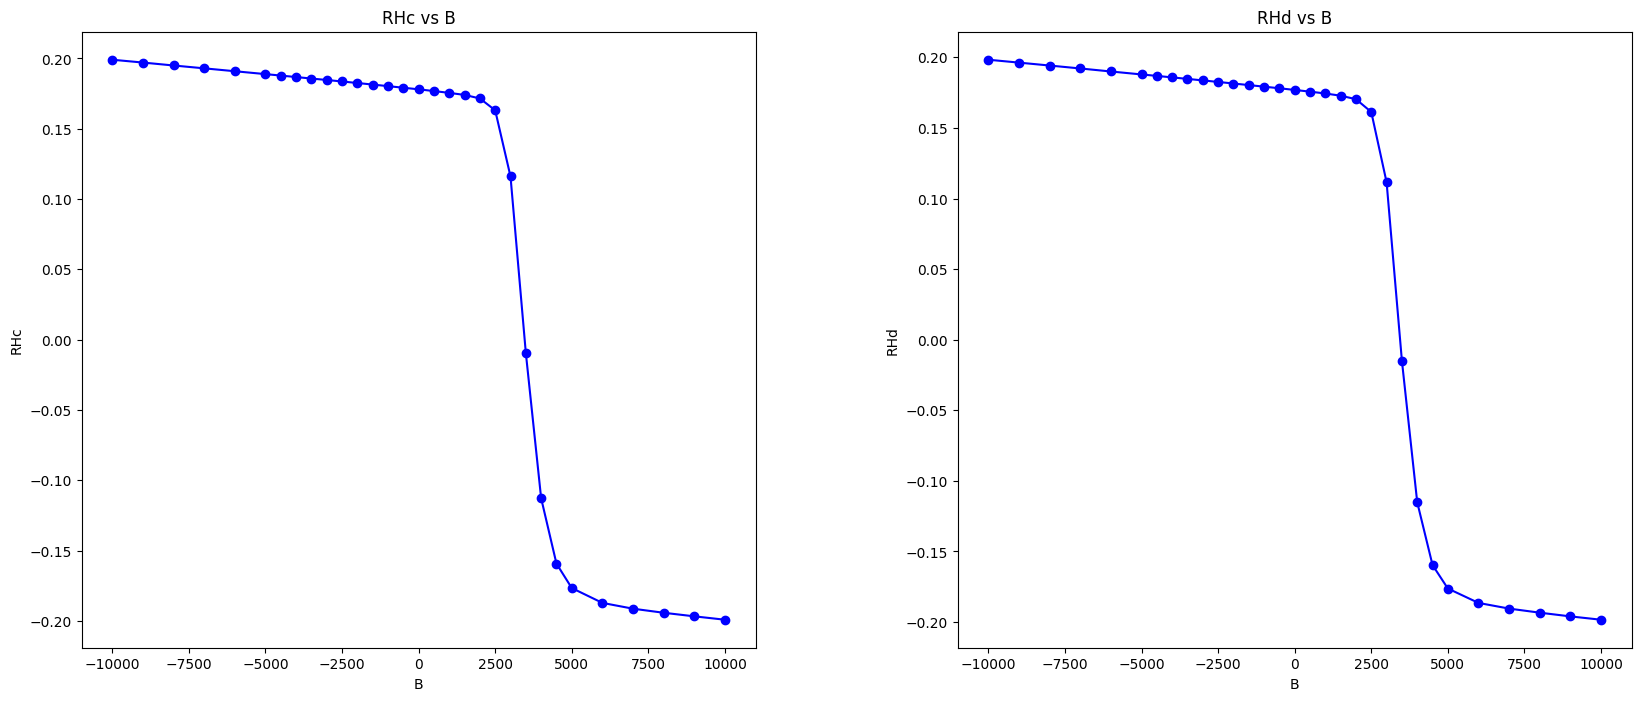

In [48]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data_inc['B'],data_inc['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data_inc['B'],data_inc['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

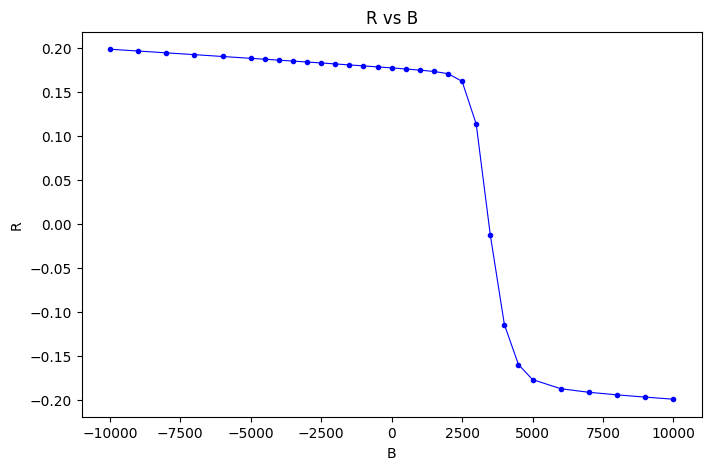

In [49]:
plt.figure(figsize=(8,5))
plt.plot(data_inc['B'],data_inc['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Plotting on same graph

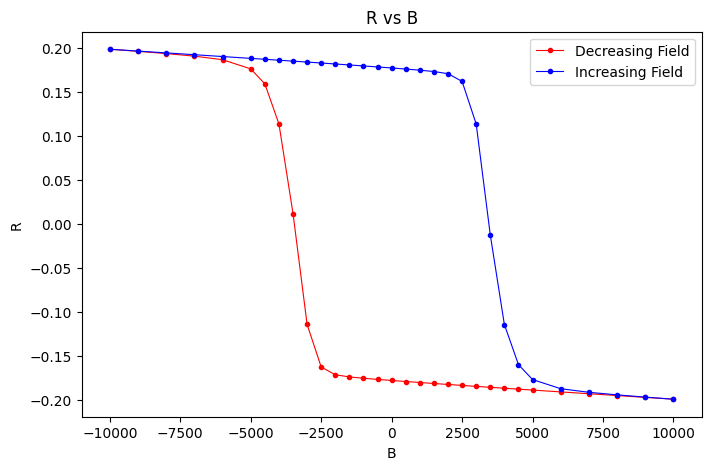

In [50]:
plt.figure(figsize=(8,5))
plt.plot(data_dec['B'], data_dec['R'], 'ro-', linewidth=0.8, markersize=3, label = 'Decreasing Field')
plt.plot(data_inc['B'],data_inc['R'],'bo-', linewidth=0.8, markersize=3, label = 'Increasing Field')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.legend()
plt.show()

In [51]:
data = pd.concat([data_dec,data_inc])
folder = "Processed_data"
loc = os.path.join(folder, filename)
try: 
    os.mkdir(folder) 
except: pass
data.reset_index(drop=True, inplace = True)
data.to_csv(f'{loc}')

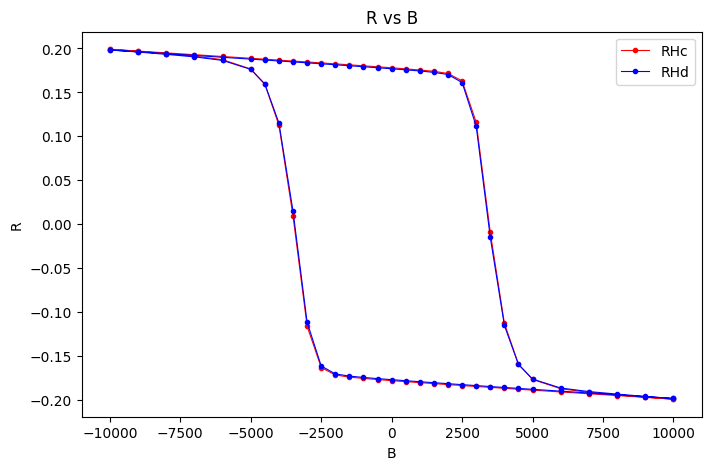

In [52]:
plt.figure(figsize=(8,5))
plt.plot(data['B'], data['RHc'], 'ro-', linewidth=0.8, markersize=3, label = 'RHc')
plt.plot(data['B'],data['RHd'],'bo-', linewidth=0.8, markersize=3, label = 'RHd')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')

plt.legend()
plt.show()